# Titanic data exercise

In [1]:
import pandas as pd
import numpy as np
import glob # to find all files in folder
from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from IPython.core.display import HTML
HTML(filename='Data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [3]:
original_data = pd.read_excel('Data/titanic.xls')
original_data['total'] = 1 # add a colon only consisting of 1s to make couting easier
original_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,total
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


## 1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.

### pclass
the class a person belongs to

In [4]:
pclass = original_data['pclass']
pclass.unique()

array([1, 2, 3])

there are 3 different classes

In [5]:
for c in pclass.unique():
    print('nbr in class '+str(c)+': '+str(len(pclass[pclass == c])))

nbr in class 1: 323
nbr in class 2: 277
nbr in class 3: 709


most are in class 3, but surprisingly class 1 has more passagengers than class 2

(array([ 323.,    0.,    0.,    0.,    0.,  277.,    0.,    0.,    0.,  709.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

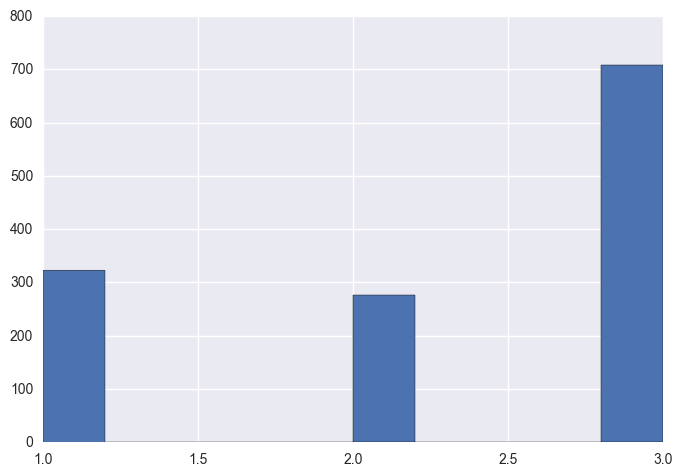

In [13]:
plt.hist(pclass.values)


### survived
States if the passenger survived the titanic sinking

In [ ]:
surv = original_data['survived']
surv.unique() # to make sure there are only 1 and 0

In [ ]:
#how many survived?
surv.sum()

In [ ]:
#how many died?
len(surv[surv == 0])

most died :( 

In [ ]:
100/len(surv.values) * surv.sum()

only 38% survived

### name
the name of the passanger

In [ ]:
name = original_data['name']
len(name.unique()) == len(name.values) 

apparently there are some with the same name

In [ ]:
len(name.values) - len(name.unique())

In [ ]:
#lets find them
original_data[name.isin(name[name.duplicated()].values)]

### sex
the sex of the passenger

In [ ]:
sex = original_data['sex']
sex.unique()

In [ ]:
nbr_males = len(sex[sex == 'male'])

In [ ]:
nbr_females= len(sex[sex == 'female'])

In [ ]:
100/len(sex) * nbr_males

64.4% are male

### age
How old the passenger is

In [ ]:
age = original_data['age']
age.unique()

There are NaN values! But also floating point values, which is somewhat unusual but not a problem per se.

In [ ]:
age.min() # a baby?

In [ ]:
age.max()

In [ ]:
age.mean()

Age distribution in a boxplot:

In [ ]:
sns.boxplot(age.dropna().values)

And the distribution of age plotted:

In [ ]:
plt.hist(age.values)

### sibsp
The number of siblings or spouses on the ship

In [ ]:
sipsp = original_data['sibsp']
sipsp.unique()

In [ ]:
sipsp.mean()

Plot histogram: Almost all traveled without siblings or spouses. there is apparently one family that traveled together (8 siblings are on board)

In [ ]:
plt.hist(sipsp)

### parch
The number of parents or children on the ship

In [ ]:
parch = original_data['parch']
parch.unique()

In [ ]:
parch.mean()

Histogram: Again almost noone traveled with their kids. The one big family is again seen here.

In [ ]:
plt.hist(parch)

Let's find the family

In [ ]:
# the kids
original_data[original_data['sibsp'] == 8]

In [ ]:
#  the parents
original_data[original_data['parch'] == 9]

This are the children and the parents of the 'big' familly. Sadly all died :(

### ticket
the ticketnbr the passanger had

In [ ]:
ticket = original_data['ticket']
len(ticket.unique())

In [ ]:
ticket.dtype

In [ ]:
len(ticket[ticket.isnull()])

All (registered) passengers had a ticket ;)

### fare
How many they paid

In [ ]:
fare = original_data['fare']
fare.mean()

In [ ]:
fare.max()

In [ ]:
fare.min()

There are people that did not pay anything

In [ ]:
original_data[fare == 0]

In [ ]:
fare.dtypes

In [ ]:
original_data[fare.isnull()]

there is one NaN value

In [ ]:
plt.hist(fare.dropna())

Someone got ripped of, or got the best room.

### cabin
What cabin they are in

In [ ]:
cabin = original_data['cabin']
cabin.isnull().sum()

1014 people have no cabin (all class 3?)

In [ ]:
plt.hist(original_data[cabin.isnull()]['pclass'])

Even people in class 1 have no cabin (or it is unknown)

Some people have several cabines, but they are also occupied by several peoples, probablement families.
It would be quite complicated to take those 'multiple cabin' entries appart. With more time we could have done it.

In [ ]:
cabin.head()

### embarked


In [ ]:
embarked = original_data['embarked']
embarked.unique()

In [ ]:
len(embarked[embarked.isnull()])

two people have NaN in 'embarked'

In [ ]:
sns.countplot(y="embarked", data=original_data, color="c");

### boat
On what rescue-boat they were rescued

In [ ]:
boat = original_data['boat']
boat.unique()

some have several boats.

### body
the identification number of a body

In [ ]:
body = original_data['body']
body.count()

121 bodys got an number

### home dest

In [ ]:
homedest = original_data['home.dest']
len(homedest.dropna().unique())

369 different home destinations
Lets find the most common one

In [ ]:
original_data[['home.dest', 'total']].groupby(by='home.dest').sum().sort_values(by='total', ascending=False)

Most come from New York



## 2. Use the `groupby` method to calculate the proportion of passengers that survived by sex:

First gather the numbers

In [ ]:
survived_by_sex = original_data[['survived', 'sex']].groupby('sex').sum()
nbr_males = len(original_data[original_data['sex'] == 'male'])
nbr_females = len(original_data[original_data['sex'] == 'female'])
nbr_total = len(original_data['sex'])
survived_by_sex

In [ ]:
print(nbr_total == nbr_females + nbr_males) # to check if consistent

Then calcultate the percentages

In [ ]:
female_survived_percentage = (100/nbr_females) * survived_by_sex.at['female', 'survived']
male_survived_percentage = (100/nbr_males) * survived_by_sex.at['male', 'survived']
print('female surv: '+str(round(female_survived_percentage, 3))+'%')
print('male surv: '+str(round(male_survived_percentage, 3))+'%')

## 3. Calculate the same proportion, but by class and sex.

In [ ]:
# make use of the 'total' column (which is all 1's in the original_data)
survived_by_class = original_data[['pclass', 'sex', 'survived', 'total']].groupby(['pclass', 'sex']).sum()
survived_by_class


In [ ]:
def combine_surv_total(row):
    #print(row)
    return 100.0/row.total * row.survived

create a new column with the apply method

In [ ]:
survived_by_class['survived in %'] = survived_by_class.apply(combine_surv_total, axis=1)
survived_by_class

Here is a plot showing the survive rates. Note that the plot is not based on the data calculated above

In [ ]:
sns.barplot(x='sex', y='survived', hue='pclass', data=original_data);

We can see that 'women first' is true, but also 'class 1 first'

## 4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

Create the categories. We use the value -1 to show that the person has a NaN value as age (and put them in the category 'No age'.

In [ ]:
original_data.age.fillna(-1, inplace=True)
age_cats = pd.cut(original_data.age, [-2, 0+1e-6,14+1e-6,20+1e-6,64+1e-6,120], labels=['No age', 'child','adolescent','adult','senior'], include_lowest=True)

In [ ]:
original_data['age-category'] = age_cats

In [ ]:
catsdata = original_data[['sex', 'age-category', 'pclass', 'survived', 'total']]

Then group the data in a sensible way to get the nice Table below.

In [ ]:
grouped = catsdata.groupby(['sex', 'age-category', 'pclass']).sum().fillna(0)
grouped

And finally calculate the survive portion for all cases

In [ ]:
def surv_proportions(row):
    if row.total == 0:
        return np.nan
    return round(100.0/row.total * row.survived, 2)

grouped['survive-portion (%)'] = grouped.apply(surv_proportions, axis=1)

In [ ]:
grouped

#### Plots

Two plots showing this. The first showing the female and the second shows the male passengers

In [ ]:
sns.barplot(x="pclass", y="survived", hue="age-category", data=original_data[original_data['sex'] == 'female'])

Almost all women from class 1 and 2 survived, in class 3 about 50% survived 

In [ ]:
sns.barplot(x="pclass", y="survived", hue="age-category", data=original_data[original_data['sex'] == 'male'])

It is interesting to see that almost no men survived, exept children. So 'children before adults' was certainly a thing.